In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from matplotlib import pyplot as plt
import scipy
import plotly.express as px

from column_functions import Calculations as clc
from data_functions import DataFunctions as dfс
from equipment_functions import Calculations as eq

In [2]:
am = pd.read_excel('data/atomic_mass.xlsx')
aqua_liquid_saturation = pd.read_excel('data/ph_H2O_saturation_liquid.xlsx')
aqua_vapor_saturation = pd.read_excel('data/ph_H2O_saturation_gas.xlsx')
aqua_vapor_saturation_by_pressure = pd.read_excel('data/ph_H2O_saturation_gas_by_pressure.xlsx')
mass_concentration_solution = pd.read_excel('data/mass_concentration_solution.xlsx')
boiling_point_solution = pd.read_excel('data/boiling_point_solution.xlsx')
density_solution = pd.read_excel('data/density_solution.xlsx')
vicosity_solution = pd.read_excel('data/vicosity_solution.xlsx')
specific_heat_capacity_solution = pd.read_excel('data/heat_capacity_solution.xlsx')
thermal_conductivity_solutions = pd.read_excel('data/thermal_conductivity_solutions.xlsx')
ph_gases = pd.read_excel('data/ph_gases.xlsx')
ph_organic = pd.read_excel('data/ph_organic.xlsx')
density_organic_liquid = pd.read_excel('data/density_organic_liquid.xlsx')
vicosity_organic_liquid = pd.read_excel('data/vicosity_organic_liquid.xlsx')
interfactial_tension_organic_liquid = pd.read_excel('data/interfacial_tension_organic_liquid.xlsx')
thermal_expansion_organic_liquid = pd.read_excel('data/thermal_expansion_organic_liquid.xlsx')
heat_capacity_organic_liquid = pd.read_excel('data/heat_capacity_organic_liquid.xlsx')
thermal_conductivity_organic_liquid = pd.read_excel('data/thermal_conductivity_organic_liquid.xlsx')
heat_vaporization_organic_liquid = pd.read_excel('data/heat_vaporization_organic_liquid.xlsx')
vapor_pressure_organic_liquid = pd.read_excel('data/vapor_pressure_organic_liquid.xlsx')
vicosity_organic_vapor = pd.read_excel('data/vicosity_organic_vapor.xlsx')

In [3]:
exclude_list =['salts','name','formula','salt']
#Поверхностное натяжение органических жидкостей [мДж/м^2]
interfactial_tension_organic_liquid = dfс.delete_hyphens(interfactial_tension_organic_liquid,exclude_list)

#Теплопроводность органических жидкостей [Вт/(м*K)]
thermal_conductivity_organic_liquid = dfс.delete_hyphens(thermal_conductivity_organic_liquid,exclude_list)

#Свойства водяного пара в состянии насыщения в зависимости от давления
aqua_vapor_saturation_by_pressure = dfс.delete_hyphens(aqua_vapor_saturation_by_pressure,exclude_list)

#Коэффициенты объемного теплового расширения органических жидкостей b*10^3, K^-1
thermal_expansion_organic_liquid = dfс.delete_hyphens(thermal_expansion_organic_liquid,exclude_list)

#Теплота парообразования органических жидкостей [кДж/кг]
heat_vaporization_organic_liquid = dfс.delete_hyphens(heat_vaporization_organic_liquid,exclude_list)

#Удельная  теплоемкость водных р-ров cp = cpAQ - w * (d1 - d2*w -d3e-3 *t^2)
specific_heat_capacity_solution = dfс.delete_hyphens(specific_heat_capacity_solution,exclude_list)

#Теплопроводность водных р-ров неорганических соединений lya = lyaAQ * (1 - f*w)
thermal_conductivity_solutions = dfс.delete_hyphens(thermal_conductivity_solutions,exclude_list)

#Давление насыщенного пара [мм.рт.ст.] над органической жидкостью
vapor_pressure_organic_liquid = dfс.delete_hyphens(vapor_pressure_organic_liquid,exclude_list)

#Удельная теплоемкость [Дж/(кг*K)] органических жидкостей
heat_capacity_organic_liquid = dfс.delete_hyphens(heat_capacity_organic_liquid,exclude_list)

#Концентрации насыщенных водных растворов неорганических веществ кг/кг при °С
mass_concentration_solution = dfс.delete_hyphens(mass_concentration_solution,exclude_list)

#Динамическая вязкость органических жидкостей [мПа*с]
vicosity_organic_liquid = dfс.delete_hyphens(vicosity_organic_liquid,exclude_list)

#Плотность органических жидкостей [кг/м^3]
density_organic_liquid = dfс.delete_hyphens(density_organic_liquid,exclude_list)

#Температуры кипения водных растворов неорганических веществ при н.у.
boiling_point_solution = dfс.delete_hyphens(boiling_point_solution,exclude_list)

#Физические свойства воды на линии насыщения
aqua_liquid_saturation = dfс.delete_hyphens(aqua_liquid_saturation,exclude_list)

#Вязкость паров органических веществ [мкПа*с]
vicosity_organic_vapor = dfс.delete_hyphens(vicosity_organic_vapor,exclude_list)

#Свойства водяного пара в состянии насыщения в зависимости от температуры
aqua_vapor_saturation = dfс.delete_hyphens(aqua_vapor_saturation,exclude_list)

#Вязкость водных растворов неорганических веществ u = uaq*exp^[w(b1 + b2e-2 * t - b3e-7 * t^2)]
vicosity_solution = dfс.delete_hyphens(vicosity_solution,exclude_list)

#Плотность водных растворов p = paq*exp^[w*(a1 + a2e-4 * t - a3e-6 * t^2)], w[кг/кг], t[°C], p[кг/м^3], u[Па*c]
density_solution = dfс.delete_hyphens(density_solution,exclude_list)

#Основные характеристики органических веществ
ph_organic = dfс.delete_hyphens(ph_organic,exclude_list)

#Свойства газов при н.у.
ph_gases = dfс.delete_hyphens(ph_gases,exclude_list)
#am = delete_hyphens(am)

In [4]:
class Сomponent():
                
    def __init__(self, name):        
        self.interfactial_tension_organic_liquid = interfactial_tension_organic_liquid[interfactial_tension_organic_liquid['name'] == name].drop('name', axis=1)
        self.thermal_conductivity_organic_liquid = thermal_conductivity_organic_liquid[thermal_conductivity_organic_liquid['name'] == name].drop('name', axis=1)
        self.thermal_expansion_organic_liquid = thermal_expansion_organic_liquid[thermal_expansion_organic_liquid['name'] == name].drop('name', axis=1)
        self.heat_vaporization_organic_liquid = heat_vaporization_organic_liquid[heat_vaporization_organic_liquid['name'] == name].drop('name', axis=1)        
        self.vapor_pressure_organic_liquid = vapor_pressure_organic_liquid[vapor_pressure_organic_liquid['name'] == name].drop('name', axis=1)
        self.heat_capacity_organic_liquid = heat_capacity_organic_liquid[heat_capacity_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_liquid = vicosity_organic_liquid[vicosity_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_liquid = vicosity_organic_liquid[vicosity_organic_liquid['name'] == name].drop('name', axis=1)
        self.density_organic_liquid = density_organic_liquid[density_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_vapor = vicosity_organic_vapor[vicosity_organic_vapor['name'] == name].drop('name', axis=1)
        self.ph_organic = ph_organic[ph_organic['name'] == name]

Ниже в поле Substance присвойте компонентам 'А' и 'В' имена веществ, смесь которых необходимо разделить. Например 'Толуол', 'Бензол', 'Этанол', 'Тетрахлорметан' и др. Полный список веществ в базе можно узнать ниже.

Из этой пары компонент 'A' должен иметь меньшую темперутуру плавления 'melting_point'. 
 
Для пар веществ должна быть таблица с экспериментальными даннымив папке 'l_v' заполненная как в образцах. Найти интересующую смесь можно в справочном пособии Коган, Фридман, Кафаров "Равновесие между жидкостью и паром" источник указан в файле README. Некоторые смеси находятся в примерах. Соотнесите 'formula' из базы данных с названием файла в папке 'l_v'. Например:
метанол-бутанол
толуол-тетрахлорметан
бензол-толуол
метанол-этанол



In [5]:
Substance = {'A':Сomponent(name='Бензол'), 'B':Сomponent(name='Толуол')}
A_name = Substance['A'].ph_organic['formula'].values
B_name = Substance['B'].ph_organic['formula'].values

ph_organic

,name,formula,molar_mass,melting_point,boiling_point,critical_point,critical_pressure
0,Анилин,C6H5NH2,93.128,-5.9,184.4,426.0,5.309
1,Ацетон,CH3COCH3,58.080,-95.4,56.2,235.5,4.701
2,Бензол,C6H6,78.114,5.5,80.1,289.4,4.894
3,Бромбензол,C6H5Br,157.010,-30.8,156.0,397.0,4.519
4,Бутанол,CH3(CH2)2CH2OH,74.123,-89.5,117.3,288.6,4.418
5,Гексан,CH3(CH2)4CH3,86.177,-95.3,68.7,234.7,2.969
6,Гептан,CH3(CH2)5CH3,100.204,-90.6,98.4,267.0,2.736
7,Дихлорэтан,ClCH2CH2Cl,98.959,-35.9,83.5,288.0,5.369
8,Изопропанол,(CH3)2CHOH,60.096,-89.5,82.4,235.6,4.762
9,о-Ксилол,C6H4(CH3)2,106.167,-25.2,144.4,358.4,3.729


В переменную diagram загружаем таблицу с данными о равновесии жидкость-пар для смеси выбранных веществ. В примере выбраны бензол и толуол, согласно базе ph_organic их формулы соответственно C6H6 и C6H5CH3. Если Вы захотите изучить свою смесь, то название файлу можете выбрать произвольное. 

ВАЖНО! в столбцах 'x' и 'y' значения должны быть в долях от единицы, а не в процентах. Если вдруг попалась таблица с процентами, то раскомментируем деление на 100 для каждого из столбцов.

In [6]:
diagram = pd.read_excel('l_v/C6H6 - C6H5CH3.xlsx')
diagram['x'] = diagram['x']#/100
diagram['y'] = diagram['y']#/100
diagram.sort_values(by = ['t'], ascending=False,ignore_index=True, inplace=True)
xy_diagram = dfс.get_coeffs(diagram['x'], diagram['y'])
diagram

,x,y,t
0,0.000,0.000,110.7
1,0.107,0.219,105.9
2,0.207,0.381,101.9
3,0.303,0.509,98.4
4,0.393,0.609,95.4
5,0.486,0.696,92.6
6,0.578,0.769,90.0
7,0.673,0.835,87.5
8,0.773,0.893,85.1
9,0.875,0.945,82.8


Ниже представлена диаграма жидкость-пар выбранной смеси компонентов. Правая диаграма показывает как сильно состав жидкой фазы отличается от состава паровой. Серой прямой показана линия, в которой составы жидкости и пара были бы равны.

На диаграмы так же наложены линии аппроксимации данных. Если автомтически подобранные функции не пересекаются в неожиданных местах, не создают странных выбросов и вообще просто лежат на данных, полностью повторяя кривую эксперимента, то расчет будет точным и без проблем. Как правило, трудности случаются со смесями с азеотропной точкой. Самым простым способом было бы добавить данных экспериментов в исходную таблицу. Так же можно в ручную искать полином, добавляя в функции dfc.get_fit(n='нужная размерность полинома')

Text(0.5, 0, "Мольная доля ['C6H6'] в жидкости")

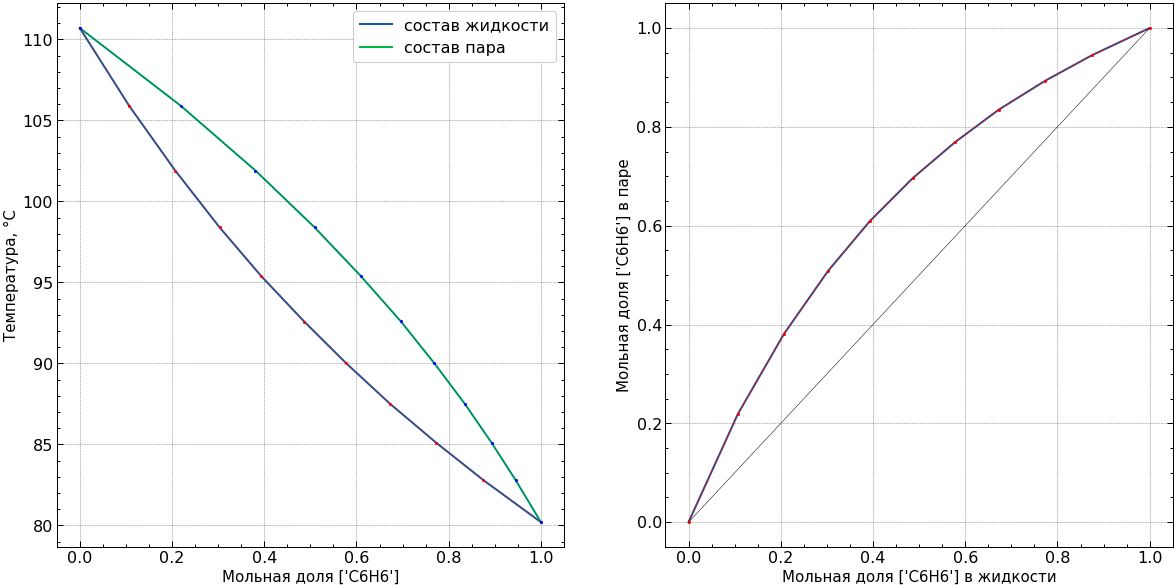

In [7]:
plt.style.use(['science', 'no-latex', 'notebook', 'grid'])


fig = plt.figure(figsize=(20,10))
axes = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)

axes.plot(diagram['x'], diagram['t'], label='состав жидкости')
axes.plot(diagram['y'], diagram['t'], label='состав пара')
axes.set_ylabel('Температура, °С', fontsize=15)
axes.set_xlabel(f'Мольная доля {A_name}', fontsize=15)

p_x = dfс.get_fit(diagram['x'], diagram['t'])
p_y = dfс.get_fit(diagram['y'], diagram['t'])
axes.plot(diagram['x'], p_x, 'o--', color='red', lw=0.5, ms=2)
axes.plot(diagram['y'], p_y, 'o--', color='blue', lw=0.5, ms=2)
axes.legend(loc='upper right')

axes2.plot(diagram['x'], diagram['y'])
x_y = dfс.get_fit(diagram['x'], diagram['y'])
axes2.plot(diagram['x'], x_y, 'o--', color='red', lw=1, ms=2)
_ = [0, 1]
axes2.plot(_, _, color='black', lw=0.5)
axes2.set_ylabel(f'Мольная доля {A_name} в паре', fontsize=15)
axes2.set_xlabel(f'Мольная доля {A_name} в жидкости', fontsize=15)


Задаемся исходными данными на проектирование. 
1. Какой производительностью должна обладать наша колонна(поле F); Верхний предел производительности ~10кг/с. При таких объемах установка требует экстремальные требования к диаметру и высоте из каталогов ГОСТа. 
2. Какой температуры раствор подается в колонну(поле FEED_TEMPERATURE, °С);
3. Сколько в исходной смеси содержится легколетучего компонента(поле FEED, %масс);
4. Какой чистоты нужно получить дистиллят (поле DISTILLATE, в долях от единицы);
5. Какой чистоты нужно получить кубовый остаток (поле BOTTOM, в долях от единицы);
6. При каком давлении проводить процесс(PRESSURE); важно помнить, что при изменении давления внтри колонны, диаграмма равновесия жидкость-пар тоже может изменяться. Некоторые закономерности показаны в файле processing_frames

In [8]:
F = np.double(5)                  #Производительность по исходной смеси кг/с
FEED_TEMPERATURE = np.double(20)  #Начальная температура
FEED = np.double(0.35)            #В исходной смеси %масс Ллт 
DISTILLATE = np.double(0.98)      #В дистилляте(ректификате) %масс 
BOTTOM = np.double(0.017)         #В кубовом остатке %масс ллт
PRESSURE = np.double(10**5)       #Давление в колонне в Па. Влияет на коэфф. диффузии пара в колонне

balance = clc.material_balance(F, FEED, DISTILLATE, BOTTOM, xy_diagram, Substance)
balance

Ma                                                [78.114]
Mb                                                [92.141]
массовый расход в питателе                             5.0
массовый расход в кубовом остатке                 3.271028
массовый расход в дефлегматоре                    1.728972
xf                                     [0.388436640491331]
xp                                    [0.9829929003185919]
xw                                   [0.01999167633015832]
yf                                    [0.6040665755664814]
Rmin                                  [1.7572992572670803]
dtype: object

Нагрузки по пару и жидкости определяются рабочим флегмовым числом 'R'; его оптимальное значение 'Ropt' можно найти путем технико-экономического расчета. Ввиду отсутствия надежной методики оцени 'Ropt' используют приближенные вычисления, основанные на определении коэффициента избытка флегмы (орошения). Задавшись различными значениями коэффициентов избытка флегмы β, находим соответствующие флегмовые числа. Графическим построением ступеней изменения концентраций между равновесной и рабочими линиями на диаграмме у – х найдем необходимое количество при каждом значении избытка флегмы

В функции ниже можно задать кол-во значений коэффициента избытка флегмы 'Bt_range', на основании которых будем искать оптимальное флегмовое число. 

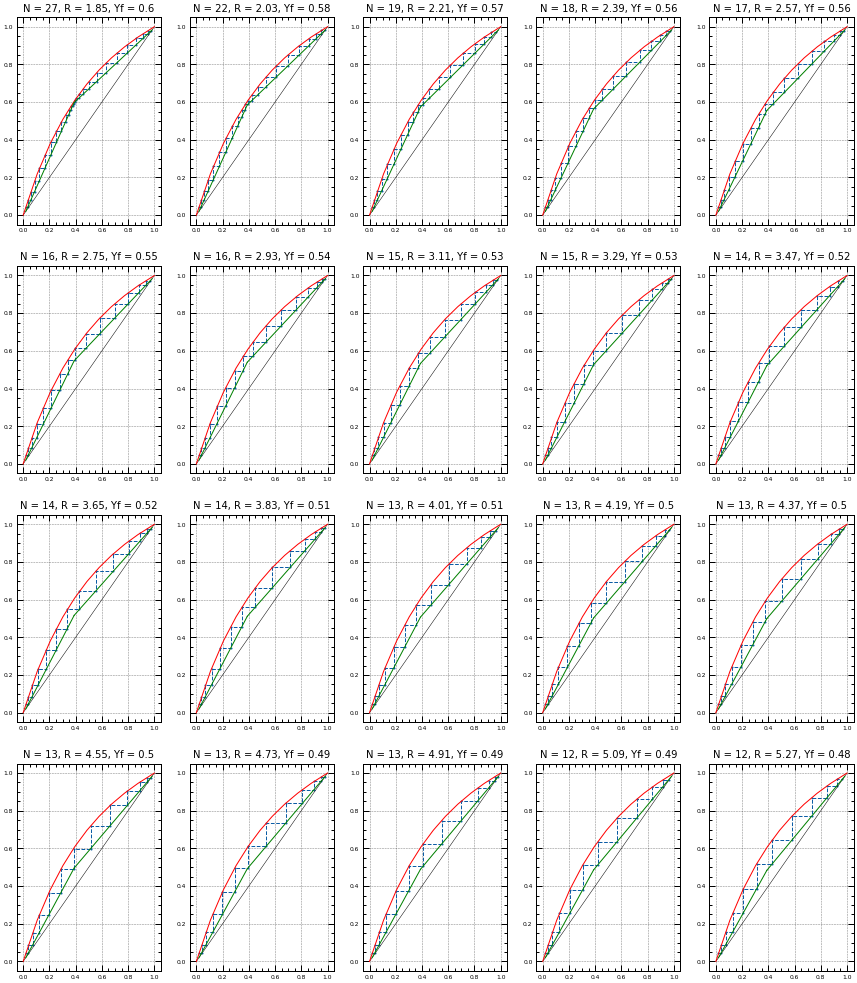

In [9]:
SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

R,Ngraf = clc.get_range_phlegm_number(
    balance['yf'],
    balance['xw'],
    balance['xf'],
    balance['xp'],
    balance['Rmin'],
    xy_diagram,
    diagram,
    Bt_range=20,#изменяемый параметр
    plot_lines='True')



На рисунке выше: 

в каждой точке коэффициента избытка флегмы находится рабочее флегмовое число 'R', по которому строится рабочая линия с координатой 'Yf'. Графическим построением ступеней 'N' изменения концентраций между равновесной и рабочими линиями на диаграмме у – х находят необходимое количество при каждом значении избытка флегмы.

На рисунке ниже:

строится график зависимости N(R + 1) = f(R). Оптимальное флегмовое число соответствует минимальному произведению N(R + 1)


Оптимальное флегмовое число = [2.39]


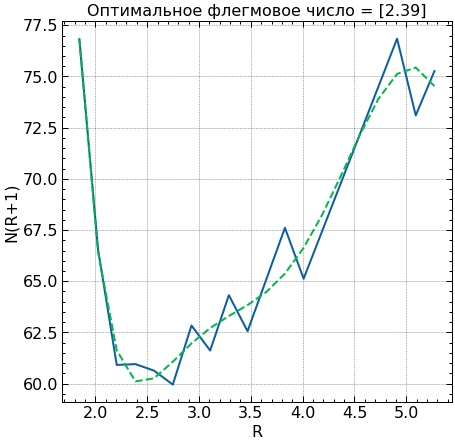

In [10]:
plt.style.use(['science', 'no-latex', 'notebook', 'grid'])
Ropt = clc.get_optimal_phlegm_number(R, Ngraf)
#Ropt = 2.1
#Здесь можно задать любое флегмовое число, раскомментировав строку выше, и посомтреть как оно влияет на конструкцию колонны

In [11]:
properties = clc.calculate_properties(diagram, balance, Substance)
properties

,температура,содержание легколетучего в жидкости,содержание легколетучего в паре,плотность жидкости,теплопроводность жидкости,теплота парообразования жидкости,удельная теплоемкость жидкости,поверхностное натяжение жидкости,давление насыщенного пара жидкости,коэффициент объемного расширения жидкости,молярный объем газа,молярная масса жидкости,молярная масса газа,плотность пара,вязкость пара,вязкость жидкости,молярный объем жидкости
куба,109.762678,0.019992,0.05,779.837843,0.112000,364.723205,2006.529720,18.488489,761.651184,1.355766,31.401223,91.860577,91.43965,2.911977,0.009151,0.249722,117.794459
низа,101.994479,0.204214,0.38,788.467040,0.115215,370.958523,1978.548527,19.202779,761.206841,1.348172,30.764182,89.276488,86.81074,2.821812,0.009140,0.263988,113.227926
питания,95.563416,0.388437,0.60,795.685722,0.118108,376.740489,1955.998162,19.780756,761.251372,1.346961,30.236795,86.692399,83.72480,2.768971,0.009113,0.277152,108.953066
верха,87.196111,0.685715,0.84,805.368993,0.122387,385.408872,1927.937492,20.528354,761.898617,1.354274,29.550624,82.522479,80.35832,2.719344,0.009063,0.296614,102.465428
дистиллята,80.542778,0.982993,0.99,813.536777,0.126447,393.541689,1907.084242,21.128299,762.373885,1.369285,29.005009,78.352559,78.25427,2.697957,0.009002,0.314584,96.311022


Высоту насадки в колонне рассчитывают по модифицированному уравнению массопередачи, для которого необходимо найти общее число единиц переноса и общую высоту единицы переноса. Число единиц переноса найдем численными методом для верхней и нижней частей колонны. Общее число единиц переноса вычисляют по уравнению:
$$ n_{oy} = \int_{yw}^{yp} \frac{dy}{y^{*}-y} $$

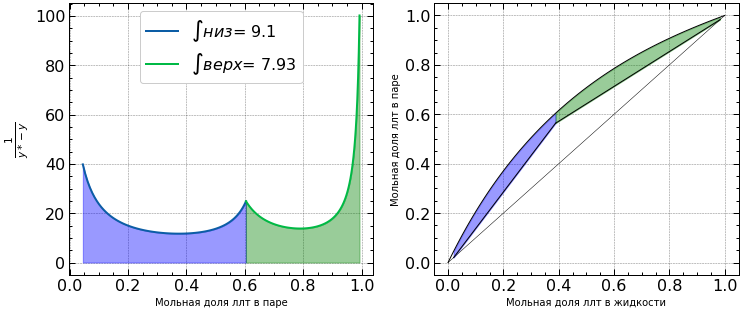

In [12]:
bottom, top = clc.get_transfer_numbers(balance, Ropt, xy_diagram)

Расчет ректиификационной колоны сводится к определению ее основных геометрических размеров - диаметра и высоты. Оба параметра в значительной мере определяются гидродинамическим режимом работы колоны, который, в свою очередь, зависит от скоростей и физических свойств фаз, а также от типа и размера насадки.
При расчете ректификационной установки приняты следующие допущения:
1. молярные теплоты испарения компонентов при одной и той же температуре приблизительно одинаковы (правило Трутона), поэтому каждый кМоль пара при конденсации испаряет 1 кМоль жидкости. Поэтому мольные потоки пара в любом сечении колонны постоянны;
2. в дефлегматоре не происходит изменения состава пара;
3. при испарении жидкости в кипятильнике не происходит изменения ее состава;
4. теплоты смешения компонентов разделяемой смеси равны нулю

В качестве насадки выбраны неупорядоченные кольца Рашига трех размеров по каталогу.

Диаметр колонны в графе 'стандартный размер обечайки' в метрах

In [13]:
diameter = clc.calculate_diameter(balance, Ropt, properties, filling_name='50x50x5')# насадки могут быть трех размеров '25x25x3' '35x35x4' '50x50x5'
diameter

массовая нагрузка жидкости верха          [4.352160812852881]
массовая нагрузка жидкости низа           [9.857398928289692]
массовый поток пара верха                  [6.01880749515315]
массовый поток пара низа                  [6.502091290258327]
предельная скорость пара верха           [1.9554265170057432]
предельная скорость пара низа             [1.582136883559107]
рабочая скорость пара верха              [1.3687985619040202]
рабочая скорость пара низа               [1.1074958184913748]
диаметр верха                            [1.4348563294314625]
диаметр низа                             [1.6275955738647714]
стандартный размер обечайки                               1.8
действительная рабочая скорость верха    [0.8697839024618755]
действительная рабочая скорость низа     [0.9055033997879981]
% от предельной скорости верха            [44.48052099619353]
% от предельной скорости низа             [57.23293661867086]
dtype: object

'общая высота колонны' в метрах

In [14]:
hight = clc.calculate_hight(
    balance,
    properties,
    diameter,
    xy_diagram,
    bottom,
    top,
    Substance,
    Ropt,
    PRESSURE,
    filling_name='50x50x5')
hight

отношение нагрузок пар/жидкость верха               [1.4184100418410042]
отношение нагрузок пар/жидкость низа                [0.6774998926875101]
коэффициент диффузии жидкости верха при 20°С     [2.157152455916271e-09]
коэффициент диффузии жидкости низа при 20°С     [2.2119815939664596e-09]
температурный коэффициент верха                                 0.016566
температурный коэффициент низа                                  0.016191
коэффициент диффузии жидкости низа               [5.148560352666184e-09]
коэффициент диффузии жидкости верха              [4.558360621092526e-09]
коэффициент диффузии пара верха                                 0.000005
коэффициент диффузии пара низа                                  0.000005
средний коэффициент распределения верха                         1.246698
средний коэффициент распределения низа                          1.867081
критерий Прандтля жидости верха                      [80.79579258788459]
критерий Прандтля жидкости низа                    

In [15]:
thermal_balance = clc.calculate_thermal_balance(balance, properties, Ropt)
thermal_balance

теплота забираемая водой в дефлегматоре     [2306.6324306259285]
теплота передаваемая паром от испарителя             1883.702444
теплота исходной смеси                                934.609329
теплота кубовой жидкости                              720.418007
теплота дистиллята                                    265.573315
теплота получаемая кипящей жидкостью         [2358.014423399037]
dtype: object

In [16]:
heaters_table = pd.read_excel('tables/Параметры кожухотрубчатых теплообменников и холодильников.xlsx',
                   header=[2])

exclude_list = ['d труб, мм']
heaters_table[exclude_list] = heaters_table[exclude_list].apply(eq.get_diameter)
heaters = eq.calculate_equipment(
    heaters_table,
    aqua_vapor_saturation_by_pressure,
    aqua_liquid_saturation,
    aqua_vapor_saturation,
    balance,
    properties,
    FEED_TEMPERATURE,
    thermal_balance,
    Ropt,
    EQ_NAME = 'подогреватель',
    ORIENTACION = 'вертикальный', #может быть 'горизонтальный'
    AQ_PRESSURE = 3) 

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
            )
fig.show()

In [17]:
row = heaters_table.loc[17]
name = '3'

heater = eq.get_heater(row,
        name,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance, properties,
        FEED_TEMPERATURE,
        Ropt,
        ORIENTACION='вертикальный',
        AQ_PRESSURE=3, call='direct')

heater



cредняя движущая сила теплопередачи                 68.996001
тепловой поток в подогревателе                  739009.513185
расход пара на подогрев                            381.129197
критерий Рейнольдса                               9115.116718
критерий Прандтля                                    4.589944
коэффициент теплоотдачи в трубах                   317.330824
коэффициент теплопередачи в межтрубном            1047.686788
сумма термических сопротивлений                      0.000459
коэффициент теплопередачи                          219.063691
требуемая поверхность теплообмена                   48.894015
запас поверхности, %                      [14.22102544237589]
dtype: object

In [18]:
heaters_table = pd.read_excel('tables/Параметры кожухотрубчатых теплообменников и холодильников.xlsx',
                   header=[2])

exclude_list = ['d труб, мм']
heaters_table[exclude_list] = heaters_table[exclude_list].apply(eq.get_diameter)
heaters = eq.calculate_equipment(
        heaters_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'испаритель',
        AQ_PRESSURE = 3)

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
            )
fig.show()

In [19]:
row = heaters_table.loc[32]
name = '3'

evaporator = eq.get_evaporator(row,
            name,                  
            aqua_vapor_saturation_by_pressure, 
            aqua_liquid_saturation,
            aqua_vapor_saturation,
            properties,
            thermal_balance,
            AQ_PRESSURE = 2,
            call = 'direct')

evaporator

необходимый расход пара                                 [1.077309221216665]
cредняя движущая сила теплопередачи                               24.666584
коэффициент теплоотдачи от пара к трубам                      252369.979462
коэффициент теплоотдачи от труб к жидкости в трубах                 2.77312
сумма термических сопротивлений                                    0.000373
удельная тепловая нагрузка                             [15764.630585223407]
требуемая поверхность теплообмена                      [149.57625620541114]
запас поверхности, %                                   [15.013490792380033]
dtype: object

In [20]:
heaters = eq.calculate_equipment(
        heaters_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'дефлегматор',
        ORIENTACION = 'вертикальный',
        AQ_PRESSURE = 3)

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
    )
fig.show()

In [21]:
row = heaters_table.loc[17]
name = '2'

heater = eq.get_heater(row,
        name,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance, properties,
        FEED_TEMPERATURE,
        Ropt,
        HEATER_NAME = 'дефлегматор',
        ORIENTACION='вертикальный',
        AQ_PRESSURE=3, call='direct')

heater

cредняя движущая сила теплопередачи                 79.461255
тепловой поток в подогревателе                  676736.925394
расход пара на подогрев                             349.01337
критерий Рейнольдса                               9413.712264
критерий Прандтля                                    4.744572
коэффициент теплоотдачи в трубах                   354.755724
коэффициент теплопередачи в межтрубном            1078.884248
сумма термических сопротивлений                      0.000459
коэффициент теплопередачи                          237.821299
требуемая поверхность теплообмена                   35.810774
запас поверхности, %                      [5.761121230262919]
dtype: object

In [22]:
heaters = eq.calculate_equipment(
        heaters_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'холодильник',
        COOLER_NAME = 'дистиллята',
        pipes = 'продукт',
        aq_t = 20,
        tk = 30
        )

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
    )
fig.show()

In [23]:
row = heaters_table.loc[13]
name = '3'
eq.get_cooler(
    row,
    name,
    aqua_liquid_saturation,
    aqua_vapor_saturation,
    properties,
    balance,
    COOLER_NAME = 'дистиллята',
    pipes = 'продукт',
    aq_t = 20,
    tk = 30,
    call = 'direct')

тепловой поток в холодильнике                    166654.459774
расход воды                                           3.623025
cредняя движущая сила теплопередачи                  25.930969
площадь сечения межтруб                               0.045239
критерий Рейнольдса межтруб                         1597.57521
критерий Прандтля межтруб                             7.007475
коэффициент теплопередачи в межтрубном              809.768924
критерий Рейнольдса в трубах                       2364.122908
критерий Прандтля в трубах                            4.744572
коэффициент теплопередачи в трубах                  134.260092
сумма термических сопротивлений                       0.000459
коэффициент теплоотдачи                             109.382106
требуемая поверхность теплообмена                    58.755957
запас поверхности, %                      [16.062918469201364]
dtype: object

In [24]:
heaters = eq.calculate_equipment(
        heaters_table,
        aqua_vapor_saturation_by_pressure,
        aqua_liquid_saturation,
        aqua_vapor_saturation,
        balance,
        properties,
        FEED_TEMPERATURE,
        thermal_balance,
        Ropt,
        EQ_NAME = 'холодильник',
        COOLER_NAME = 'куба',
        pipes = 'продукт',
        aq_t = 20,
        tk = 30
        )

fig = px.imshow(
    round(heaters),
    labels=dict(x="Длина труб", y="Хараеткристики теплообменника", color="Запас поверхности, %"),
    range_color=[-40,80],
    color_continuous_scale=["rgb(178, 50, 34)", "rgb(34, 149, 34)", "rgb(25, 65, 225)"],
    x=heaters.columns,
    y=heaters.index,
    text_auto=True, aspect="auto",
    width=500,
    height=1000
    )
fig.show()

In [25]:
row = heaters_table.loc[40]
name = '9'
eq.get_cooler(
    row,
    name,
    aqua_liquid_saturation,
    aqua_vapor_saturation,
    properties,
    balance,
    COOLER_NAME = 'куба',
    pipes = 'продукт',
    aq_t = 20,
    tk = 30,
    call = 'direct')

тепловой поток в холодильнике                   523515.557649
расход воды                                         11.381095
cредняя движущая сила теплопередачи                 34.708284
площадь сечения межтруб                              0.180956
критерий Рейнольдса межтруб                       1568.281382
критерий Прандтля межтруб                            7.007475
коэффициент теплопередачи в межтрубном             641.848352
критерий Рейнольдса в трубах                       733.313025
критерий Прандтля в трубах                           4.473878
коэффициент теплопередачи в трубах                  30.806617
сумма термических сопротивлений                      0.000459
коэффициент теплоотдачи                             29.004278
требуемая поверхность теплообмена                  520.037177
запас поверхности, %                      [32.02128410537737]
dtype: object